# Customer Segmentation 

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("C:/Users/Rahul/Desktop/Assesment/Data_problem _1.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Exploration

In [27]:
df.shape

(8950, 18)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [29]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Now let's get the summary for continous dataset**

In [30]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [31]:
num_features = df.select_dtypes([np.number])

In [32]:
num_features.apply(var_summary).T


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


In [33]:
# droping customer_id because we don't need this for modeling experiments
df = df.drop('CUST_ID', axis = 1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Dealing with missing value

In [34]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [35]:
def find_missing_percent(dataframe):
    """
        Input = get a dataframe in which you want to find the missing value
        return = total missing percentage
    """
    percent_nan = 100 * dataframe.isnull().sum() / len(dataframe)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [36]:
miss_per = find_missing_percent(df)
miss_per

CREDIT_LIMIT        0.011173
MINIMUM_PAYMENTS    3.497207
dtype: float64

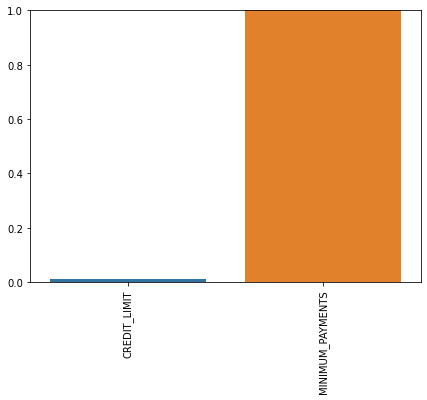

In [37]:
plt.figure(figsize=(7,5))
sns.barplot(x = miss_per.index, y = miss_per)
plt.xticks(rotation=90)
plt.ylim(0,1);

**From above we say that in `MINIMUM_PAYMENTS` 3.5% data is missing and in `CREDIT_LIMIT` 0.01% data is missing. Because in `CREDIT_LIMIT` missing data is very low so we can drop it**

In [38]:
df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [39]:
print(len(df))
df = df.drop(5203)
print(len(df))

8950
8949


**Now as for missing values in `MINIMUM_PAYMENTS` we can replace with it median**

In [40]:
df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [41]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Dealing with outliers

In [42]:
num_vars = df.columns
num_vars

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

**Here we are using `Boxplot` for finding outliers in every columns of our data**

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


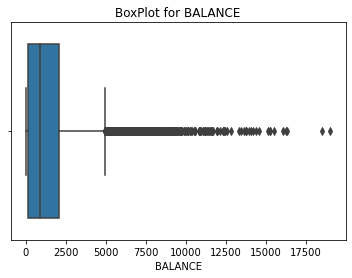

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


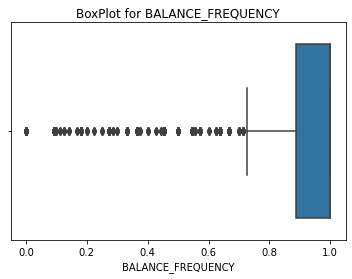

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


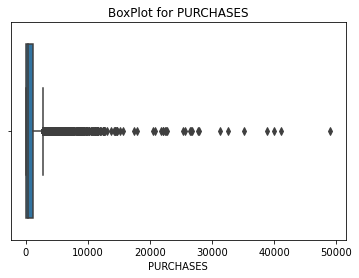

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


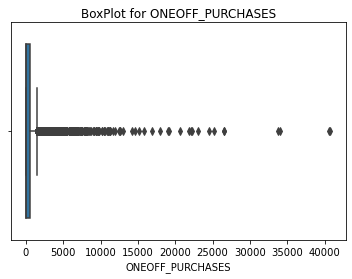

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


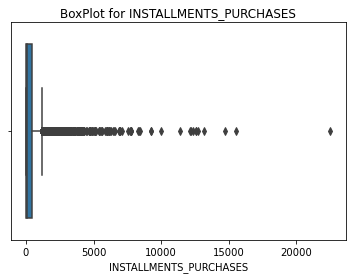

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


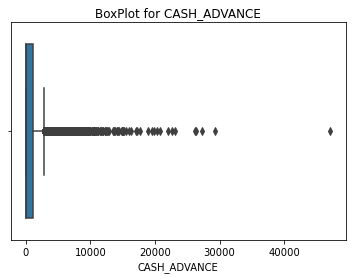

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


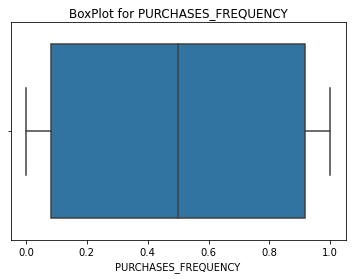

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


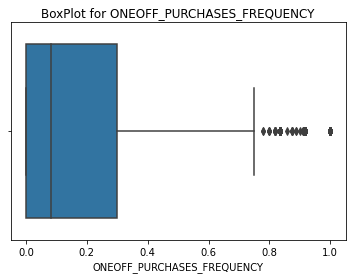

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


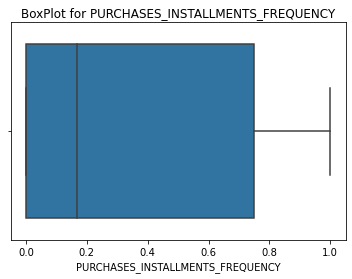

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


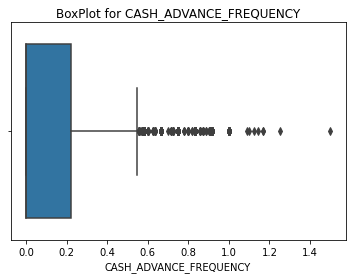

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


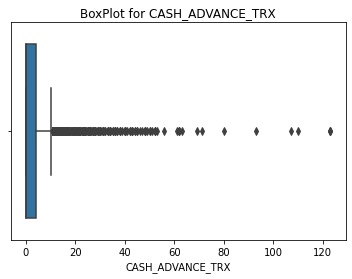

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


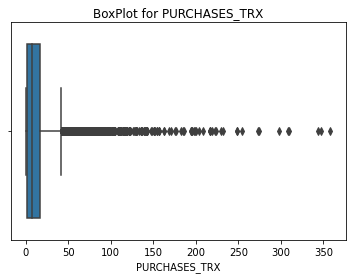

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


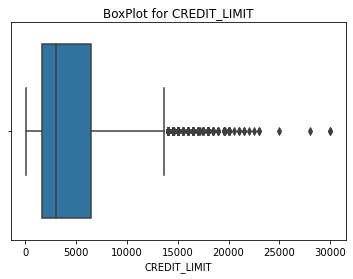

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


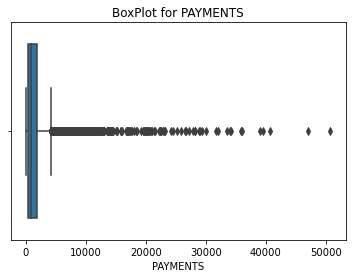

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


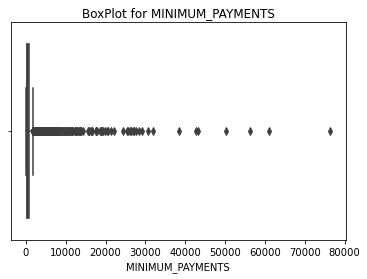

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


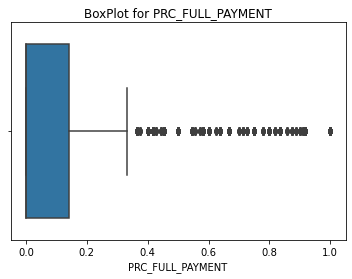

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


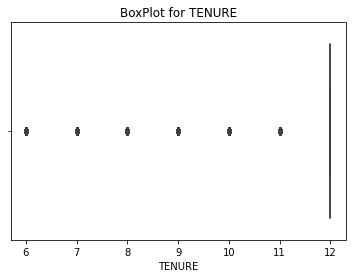

In [43]:
for var in num_vars:
    sns.boxplot(df[var]);
    plt.title('BoxPlot for {}'.format(var))
    plt.show()

**From above plots we found that there is outliers present in our dataset so we use `PowerTransformer` to transform these data in our dataset**

In [44]:
from sklearn.preprocessing import PowerTransformer

In [45]:
pt = PowerTransformer()
print(pt.fit_transform(df))

[[-1.23833786 -1.0801604  -0.36831098 ... -0.82502551 -0.67793662
   0.42210751]
 [ 1.05188287 -0.4256199  -1.50536123 ...  0.91748237  1.23484635
   0.42210751]
 [ 0.86050618  0.62852726  0.52149237 ...  0.4759187  -0.67793662
   0.42210751]
 ...
 [-1.40957025 -0.9921333  -0.21655169 ... -1.30177584  1.32828513
  -2.52719186]
 [-1.55874115 -0.9921333  -1.50536123 ... -1.66214063  1.32828513
  -2.52719186]
 [-0.32454944 -1.6469605   0.70189133 ... -1.23886969 -0.67793662
  -2.52719186]]


In [46]:
df.shape

(8949, 17)

In [47]:
df1 = df.copy()
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Building KPIs(Key Performance Indicator) to understand customer profiles

**1. Monthly average purchase**

In [48]:
Month_avg_pur = df['PURCHASES']/df['TENURE']

Month_avg_pur

0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8945     48.520000
8946     50.000000
8947     24.066667
8948      0.000000
8949    182.208333
Length: 8949, dtype: float64

In [49]:
df['Monthly_Avg_Purchase'] = df['PURCHASES']/df['TENURE']

In [50]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,124.916667
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333


**2. Monthly avg cash**

In [51]:
Monthly_Avg_Cash = df['CASH_ADVANCE']/df['TENURE']

print(Monthly_Avg_Cash)

0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8945      0.000000
8946      0.000000
8947      0.000000
8948      6.093130
8949     21.173335
Length: 8949, dtype: float64


In [52]:
df['Monthly_Avg_Cash'] = df['CASH_ADVANCE']/df['TENURE']

In [53]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000


**3. Purchase information of customers**

In [54]:
df_pur = df[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]
df_pur

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [55]:
df_pur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ONEOFF_PURCHASES        8949 non-null   float64
 1   INSTALLMENTS_PURCHASES  8949 non-null   float64
dtypes: float64(2)
memory usage: 209.7 KB


In [56]:
df_pur[(df_pur['ONEOFF_PURCHASES'] == 0) & (df_pur['INSTALLMENTS_PURCHASES'] == 0)].shape

(2041, 2)

In [57]:
df_pur[(df_pur['ONEOFF_PURCHASES'] > 0) & (df_pur['INSTALLMENTS_PURCHASES'] == 0)].shape

(1874, 2)

In [58]:
df_pur[(df_pur['ONEOFF_PURCHASES'] == 0) & (df_pur['INSTALLMENTS_PURCHASES'] > 0)].shape

(2260, 2)

In [59]:
df_pur[(df_pur['ONEOFF_PURCHASES'] > 0) & (df_pur['INSTALLMENTS_PURCHASES'] > 0)].shape

(2774, 2)

**From above we found that there is total 4 types of purchase in our dataset**
  * **1) Both_the_Purchases**
  * **2) Installment_Purchases**
  * **3) None_Of_the_Purchases**
  * **4) One_Of_Purchase**

In [60]:
df['Purchase_type'] = np.where((df['ONEOFF_PURCHASES'] == 0) & (df['INSTALLMENTS_PURCHASES'] == 0),'None_Of_the_Purchases',
                    np.where((df['ONEOFF_PURCHASES'] > 0) & (df['INSTALLMENTS_PURCHASES'] == 0), 'One_Of_Purchase',
np.where((df_pur['ONEOFF_PURCHASES'] == 0) & (df_pur['INSTALLMENTS_PURCHASES'] > 0),'Installment_Purchases','Both_the_Purchases')))

In [61]:
df['Purchase_type'].value_counts()

Both_the_Purchases       2774
Installment_Purchases    2260
None_Of_the_Purchases    2041
One_Of_Purchase          1874
Name: Purchase_type, dtype: int64

**For better understanding of purchase we use pie_plot**

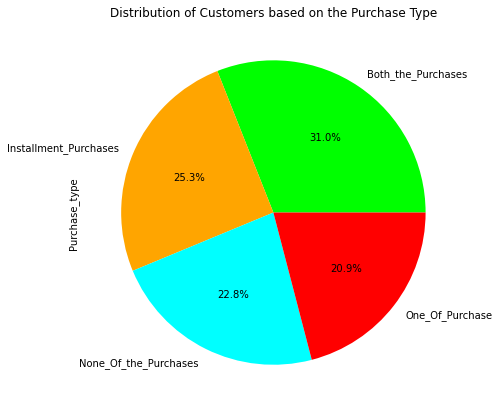

In [62]:
plt.figure(figsize=(9,7))
df['Purchase_type'].value_counts().sort_index().plot(kind='pie',autopct='%1.01f%%', 
                     colors =['#00FF00','#FFA500','#00FFFF','#FF0000'],fontsize=10,textprops = {'fontsize': 18})
plt.title('Distribution of Customers based on the Purchase Type')
plt.show();

**4.Estimating the Limit Usage of customers**

In [63]:
df['Limit_Usage'] = df['BALANCE']/df['CREDIT_LIMIT']
df['Limit_Usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: Limit_Usage, Length: 8949, dtype: float64

**5.Payments to Minimum_Payments Ratio**

In [64]:
df['Pay_to_MinimumPay'] = df['PAYMENTS']/df['MINIMUM_PAYMENTS']
df['Pay_to_MinimumPay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.882891
8947    0.986076
8948    0.942505
8949    0.715439
Name: Pay_to_MinimumPay, Length: 8949, dtype: float64

## Getting insight using KPIs we build above

**Pay_to_MinimumPay over Purchase Type**

In [65]:
a = df.groupby(by=['Purchase_type'])['Pay_to_MinimumPay'].mean().sort_values(ascending=False)
a

Purchase_type
Installment_Purchases    13.258996
None_Of_the_Purchases    10.092080
Both_the_Purchases        7.236979
One_Of_Purchase           5.571042
Name: Pay_to_MinimumPay, dtype: float64

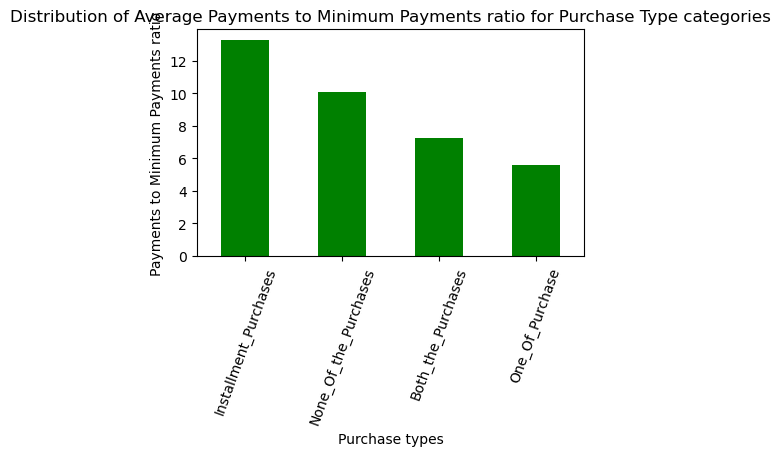

In [66]:
plt.figure(figsize = (5,3), dpi = 100)
a.plot(kind='bar',color='green')
plt.title('Distribution of Average Payments to Minimum Payments ratio for Purchase Type categories')
plt.xlabel('Purchase types')
plt.ylabel('Payments to Minimum Payments ratio')
plt.xticks(rotation=70)
plt.show();

**Balance to Credit Limit ratio (or Utilization rate) over Purchase Type**

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


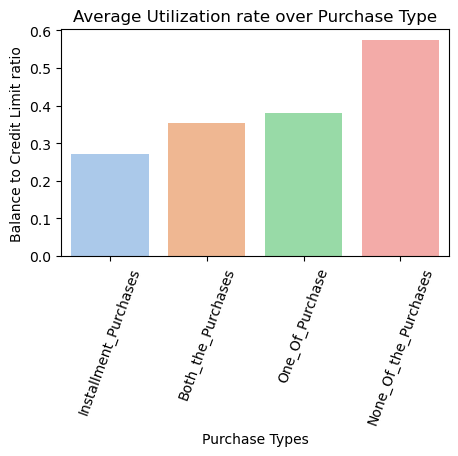

In [71]:
b = df.groupby(['Purchase_type'])['Limit_Usage'].mean().sort_values(ascending = True).reset_index()
plt.figure(figsize = (5,3), dpi = 100)
sns.barplot(b['Purchase_type'], b['Limit_Usage'], palette='pastel')
plt.title('Average Utilization rate over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Balance to Credit Limit ratio')
plt.xticks(rotation=70)
plt.show();

In [70]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Purchase_type,Limit_Usage,Pay_to_MinimumPay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installment_Purchases,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None_Of_the_Purchases,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One_Of_Purchase,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,One_Of_Purchase,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One_Of_Purchase,0.681429,2.771075


**Monthly_Avg_Purchase over Purchase Type**

In [72]:
df_copy = df.copy()
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Purchase_type,Limit_Usage,Pay_to_MinimumPay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installment_Purchases,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None_Of_the_Purchases,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One_Of_Purchase,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,One_Of_Purchase,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One_Of_Purchase,0.681429,2.771075


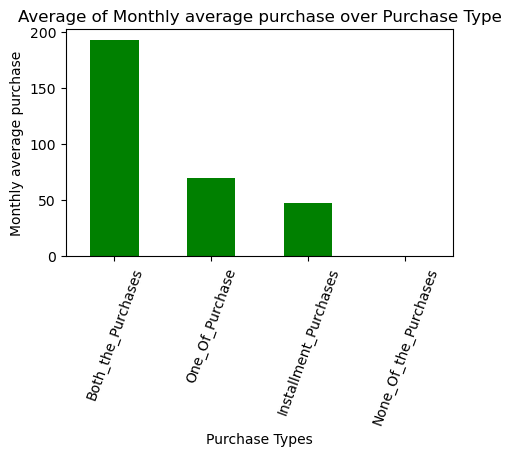

In [74]:
c = df.groupby(by=['Purchase_type'])['Monthly_Avg_Purchase'].mean().sort_values(ascending=False) 
plt.figure(figsize = (5,3), dpi = 100)
c.plot(kind='bar',color='green')
plt.title('Average of Monthly average purchase over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly average purchase')
plt.xticks(rotation=70)
plt.show();

**Monthly_Cash_Advance over Purchase Type**

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


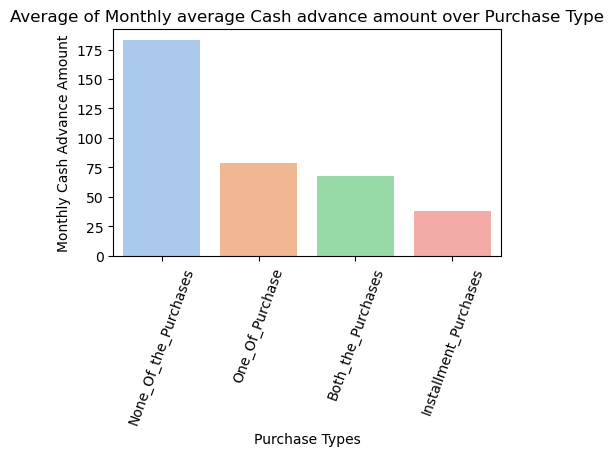

In [75]:
d = df.groupby(['Purchase_type'])['Monthly_Avg_Cash'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize = (5,3), dpi = 100)
sns.barplot(d['Purchase_type'], d['Monthly_Avg_Cash'], palette='pastel')
plt.title('Average of Monthly average Cash advance amount over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly Cash Advance Amount')
plt.xticks(rotation = 70)
plt.show();

**To find the corelatioin between features**

**Now drop `['BALANCE','CREDIT_LIMIT','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE']` features we add new features in our dataset now we don't need these features**

In [76]:
df = df.drop(['BALANCE','CREDIT_LIMIT','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE'], axis = 1)
df.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Purchase_type,Limit_Usage,Pay_to_MinimumPay
0,0.818182,0.00,95.4,0.166667,0.000000,0.083333,0.000000,0,2,0.000000,7.950000,0.000000,Installment_Purchases,0.040901,1.446508
1,0.909091,0.00,0.0,0.000000,0.000000,0.000000,0.250000,4,0,0.222222,0.000000,536.912124,None_Of_the_Purchases,0.457495,3.826241
2,1.000000,773.17,0.0,1.000000,1.000000,0.000000,0.000000,0,12,0.000000,64.430833,0.000000,One_Of_Purchase,0.332687,0.991682
3,0.636364,1499.00,0.0,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,124.916667,17.149001,One_Of_Purchase,0.222223,0.000000
4,1.000000,16.00,0.0,0.083333,0.083333,0.000000,0.000000,0,1,0.000000,1.333333,0.000000,One_Of_Purchase,0.681429,2.771075


In [77]:
df.shape

(8949, 15)

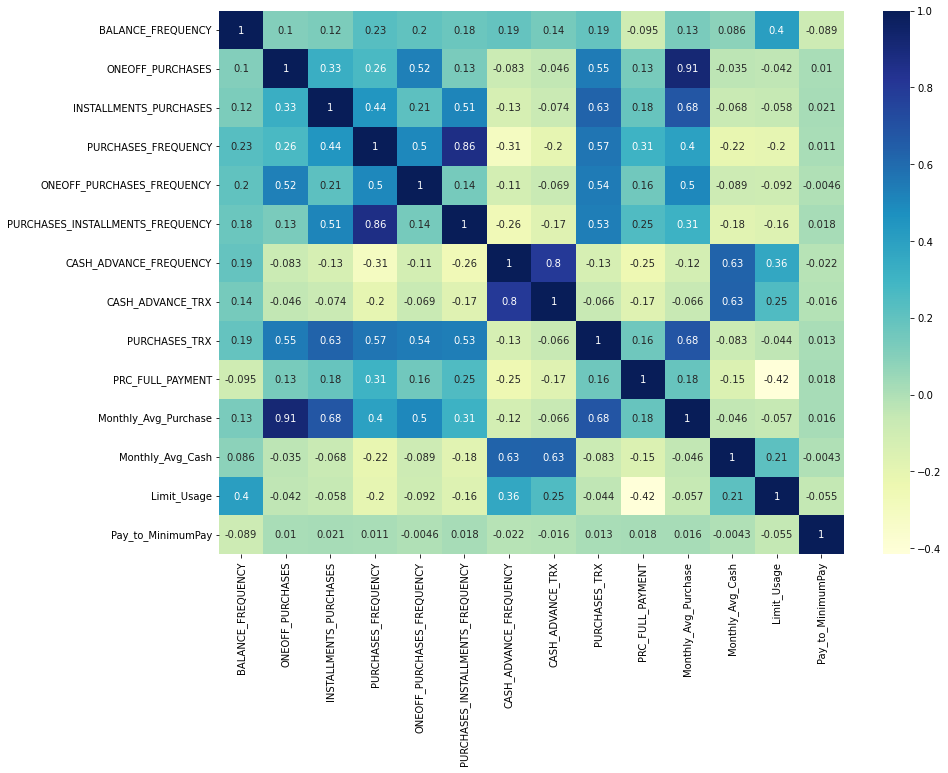

In [78]:
plt.figure(figsize = (14,10))
sns.heatmap(data = df.corr(), cmap = 'YlGnBu', annot = True);

## Data prep

In [80]:
x_cat = pd.get_dummies(df['Purchase_type'], drop_first=True)
x_cat

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8945,1,0,0
8946,1,0,0
8947,1,0,0
8948,0,1,0


In [92]:
x_num = df.dtypes[df.dtypes != 'object'].index.to_list()
x_num

['BALANCE_FREQUENCY',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'PRC_FULL_PAYMENT',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [93]:
x_num_df1 = df1.dtypes[df1.dtypes != 'object'].index.to_list()
x_num_df1

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

**Concat our X_cat and num_df1**

In [94]:
original_df = pd.concat([x_cat, df1[x_num_df1]], axis=1)
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [84]:
final_df.shape

(8949, 20)

In [85]:
final_df.isnull().sum()

Installment_Purchases               0
None_Of_the_Purchases               0
One_Of_Purchase                     0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Now scaling our num_df and then concat with final_df**

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [95]:
x_scaled = pd.DataFrame(scaler.fit_transform(df[x_num]), columns=x_num)
x_scaled.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


In [103]:
concat_df = pd.concat([x_cat.reset_index(), x_scaled.reset_index()], axis=1,)
concat_df.head()

,index,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,index,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,0,1,0,0,0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,1,0,1,0,1,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,2,0,0,1,2,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,3,0,0,1,3,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,4,0,0,1,4,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


In [104]:
concat_df.isnull().sum()

index                               0
Installment_Purchases               0
None_Of_the_Purchases               0
One_Of_Purchase                     0
index                               0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PRC_FULL_PAYMENT                    0
Monthly_Avg_Purchase                0
Monthly_Avg_Cash                    0
Limit_Usage                         0
Pay_to_MinimumPay                   0
dtype: int64

## Dimension Reduction

In [105]:
from sklearn.decomposition import PCA

In [107]:
pca_model = PCA(n_components = 17)
X_PCA = pca_model.fit_transform(concat_df)
X_PCA.shape

(8949, 17)

In [108]:
pca_var = pca_model.explained_variance_ratio_
np.cumsum(pca_var)

array([0.99999892, 0.99999924, 0.99999944, 0.99999955, 0.99999964,
       0.99999972, 0.99999979, 0.99999984, 0.99999987, 0.99999991,
       0.99999994, 0.99999996, 0.99999997, 0.99999999, 0.99999999,
       1.        , 1.        ])

In [109]:
var = np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=6)*100)
var

array([99.9999, 99.9999, 99.9999, 99.9999, 99.9999, 99.9999, 99.9999,
       99.9999, 99.9999, 99.9999, 99.9999, 99.9999, 99.9999, 99.9999,
       99.9999, 99.9999, 99.9999])

In [111]:
vec_val = pd.DataFrame({'Eigen_Values':pca_model.explained_variance_, 'Cumulative_Variance':var}, 
                       index=range(1,18)).round(4)
vec_val

,Eigen_Values,Cumulative_Variance
1,1.335110e+07,99.9999
2,4.365900e+00,99.9999
3,2.571600e+00,99.9999
4,1.450200e+00,99.9999
5,1.298400e+00,99.9999
6,1.004100e+00,99.9999
7,9.128000e-01,99.9999
8,6.931000e-01,99.9999
9,4.727000e-01,99.9999
10,4.329000e-01,99.9999


In [112]:
PCA_7 = PCA(n_components=7)
X_PCA_7 = PCA_7.fit_transform(concat_df)
PC = pd.DataFrame(X_PCA_7, columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7'.split()])
PC


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-6327.487309,-1.228306,-1.913768,0.169136,-0.033564,0.128858,-0.543884
1,-6326.073193,-2.529774,0.459874,0.204966,-0.956878,-0.173581,-0.309222
2,-6324.659156,0.693748,-0.619550,0.544412,1.167251,-0.802428,2.107466
3,-6323.244753,-1.155276,-1.244815,1.513004,0.073689,0.120673,-0.599449
4,-6321.830544,-1.600740,-1.090891,0.161761,1.328248,0.202452,-0.048516
...,...,...,...,...,...,...,...
8944,6321.945840,1.402716,-1.026675,-1.338873,-0.591970,-0.424904,0.378914
8945,6323.360033,1.076930,-0.751462,-1.396100,0.149085,0.041175,0.058221
8946,6324.774288,0.773633,-1.159312,-0.788106,-0.392158,-0.188378,0.039564
8947,6326.188489,-1.154810,-0.590567,0.961090,-0.145806,-0.245735,-0.157486


In [113]:
list_cols = concat_df.columns
PC_with_all_variables = pd.DataFrame(PCA_7.components_.T, columns = ['PC_'+str(i) for i in range(1,8)], index = list_cols)
PC_with_all_variables

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
index,0.707164,0.000683,0.001577,-0.001289,0.000636,0.002947,-0.003329
Installment_Purchases,0.000021,0.026725,-0.086763,-0.160034,-0.090740,0.035735,-0.099585
None_Of_the_Purchases,0.000002,-0.112900,0.045668,0.056926,0.016988,0.038190,-0.078934
One_Of_Purchase,-0.000005,-0.031607,-0.014450,0.141060,0.060531,-0.051172,0.103876
index,0.707049,-0.000616,-0.001484,0.001330,-0.000596,-0.002951,0.003348
BALANCE_FREQUENCY,-0.000030,0.063469,0.290096,-0.345568,0.400584,-0.094067,0.299695
ONEOFF_PURCHASES,-0.000037,0.295192,0.225126,0.467900,0.097088,-0.004458,-0.039026
INSTALLMENTS_PURCHASES,-0.000022,0.324856,0.150568,-0.096874,-0.098105,0.207946,-0.478222
PURCHASES_FREQUENCY,-0.000006,0.384395,0.006371,-0.365812,-0.076048,-0.079944,0.244271
ONEOFF_PURCHASES_FREQUENCY,-0.000047,0.280453,0.149694,0.237569,0.127633,-0.225958,0.542638


In [114]:
pd.Series(PCA_7.explained_variance_ratio_*100, index = ['PC_' + str(i) for i in range(1,8)])

PC_1    99.999892
PC_2     0.000033
PC_3     0.000019
PC_4     0.000011
PC_5     0.000010
PC_6     0.000008
PC_7     0.000007
dtype: float64

## Clustring

In [116]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

Scatter plot for Principal Components 0 and 1


C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


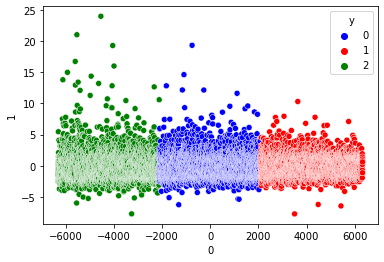

Scatter plot for Principal Components 1 and 2


C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


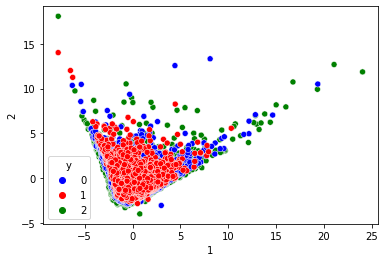

Scatter plot for Principal Components 2 and 3


C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


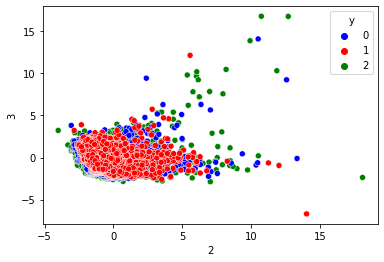

Scatter plot for Principal Components 3 and 4


C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


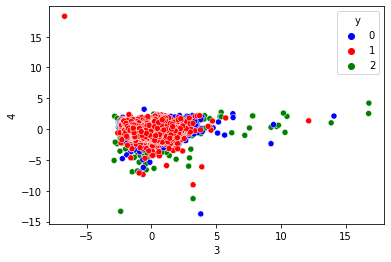

Scatter plot for Principal Components 4 and 5


C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


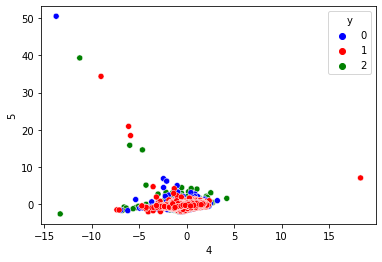

Scatter plot for Principal Components 5 and 6


C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


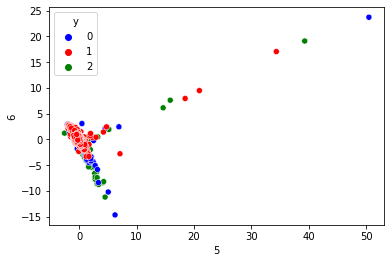

In [117]:
kmeans = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0)
kmeans.fit(X_PCA_7)

df_pca = pd.DataFrame(X_PCA_7)
y_lab = pd.Series(kmeans.labels_, name = 'y') 
df_final = pd.concat([df_pca, y_lab], axis = 1)


for i in range(6):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(df_pca[i], df_pca[i+1], hue = df_final['y'], palette = ['blue', 'red', 'green'])
    plt.show()

**Segment Distribution**

In [118]:
km_3 = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0)             
KM_3 = km_3.fit(X_PCA_7)
KM_3.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [119]:
KM_3.cluster_centers_

array([[-1.56737442e+01, -4.28220086e-02,  3.91283267e-02,
         5.29174047e-02,  4.79359554e-02, -1.53380100e-02,
         3.19750834e-02],
       [ 4.21335336e+03,  3.29791389e-02, -1.63734672e-03,
        -2.13616765e-02, -2.54425827e-03,  6.24277282e-03,
        -1.96454174e-02],
       [-4.22879457e+03,  9.88695826e-03, -3.77424266e-02,
        -3.17539064e-02, -4.56957542e-02,  9.15229992e-03,
        -1.23994884e-02]])

**Clsuters for K = 4,5, 6,7,8**

In [120]:
KM_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_5 = KMeans(n_clusters = 5, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_6 = KMeans(n_clusters = 6, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_7 = KMeans(n_clusters = 7, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_8 = KMeans(n_clusters = 8, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)

In [121]:
original_df['cluster_3'] = KM_3.labels_
original_df['cluster_4'] = KM_4.labels_
original_df['cluster_5'] = KM_5.labels_
original_df['cluster_6'] = KM_6.labels_
original_df['cluster_7'] = KM_7.labels_
original_df['cluster_8'] = KM_8.labels_

In [122]:
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,201.802084,139.509787,0.000000,12,2,2,4,5,4,2
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,4103.032597,1072.340217,0.222222,12,2,2,4,5,4,2
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,622.066742,627.284787,0.000000,12,2,2,4,5,4,2
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,0.000000,312.452292,0.000000,12,2,2,4,5,4,2
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,678.334763,244.791237,0.000000,12,2,2,4,5,4,2


## Profiling

**Step - 1**

In [123]:
# finding how many unique value our cluster have
original_df.cluster_3.size
original_df.cluster_3.value_counts()

1    2991
0    2984
2    2974
Name: cluster_3, dtype: int64

In [124]:
pd.Series.sort_index(original_df.cluster_3.value_counts())

size=pd.concat([pd.Series(original_df.cluster_3.size), pd.Series.sort_index(original_df.cluster_3.value_counts()), pd.Series.sort_index(original_df.cluster_4.value_counts()),
           pd.Series.sort_index(original_df.cluster_5.value_counts()), pd.Series.sort_index(original_df.cluster_6.value_counts()),
           pd.Series.sort_index(original_df.cluster_7.value_counts()), pd.Series.sort_index(original_df.cluster_8.value_counts())])

Seg_size=pd.DataFrame(size, columns=['Seg_size'])

# Segment Distribtuion % wise:
Seg_Pct = pd.DataFrame(size/original_df.cluster_3.size, columns=['Seg_Pct'])

In [125]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.333445,0.334227,0.332328,0.250084,0.24986,0.250307,0.249749,0.200358,0.200358,...,0.141357,0.14348,0.124707,0.125712,0.125377,0.124148,0.125489,0.125042,0.124036,0.125489


In [126]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8949.0,2984.000000,2991.000000,2974.000000,2238.000000,2236.00000,2240.000000,2235.000000,1793.000000,1793.000000,...,1265.000000,1284.00000,1116.000000,1125.000000,1122.000000,1111.000000,1123.000000,1119.000000,1110.000000,1123.000000
Seg_Pct,1.0,0.333445,0.334227,0.332328,0.250084,0.24986,0.250307,0.249749,0.200358,0.200358,...,0.141357,0.14348,0.124707,0.125712,0.125377,0.124148,0.125489,0.125042,0.124036,0.125489


**Step-2**

In [127]:
original_df.apply(np.mean).T

Installment_Purchases                  0.252542
None_Of_the_Purchases                  0.228070
One_Of_Purchase                        0.209409
BALANCE                             1564.647593
BALANCE_FREQUENCY                      0.877350
PURCHASES                           1003.316936
ONEOFF_PURCHASES                     592.503572
INSTALLMENTS_PURCHASES               411.113579
CASH_ADVANCE                         978.959616
PURCHASES_FREQUENCY                    0.490405
ONEOFF_PURCHASES_FREQUENCY             0.202480
PURCHASES_INSTALLMENTS_FREQUENCY       0.364478
CASH_ADVANCE_FREQUENCY                 0.135141
CASH_ADVANCE_TRX                       3.249078
PURCHASES_TRX                         14.711476
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.336511
MINIMUM_PAYMENTS                     845.003358
PRC_FULL_PAYMENT                       0.153732
TENURE                                11.517935
cluster_3                              0

In [128]:
original_df.groupby('cluster_3').apply(np.mean).T

cluster_3,0,1,2
Installment_Purchases,0.215483,0.354731,0.186954
None_Of_the_Purchases,0.246314,0.225677,0.212172
One_Of_Purchase,0.223190,0.181879,0.223268
BALANCE,1645.514041,973.186305,2078.351436
BALANCE_FREQUENCY,0.889050,0.843606,0.899549
PURCHASES,998.735214,681.221585,1331.850578
ONEOFF_PURCHASES,590.015982,349.727917,839.162939
INSTALLMENTS_PURCHASES,408.953358,332.089040,492.757323
CASH_ADVANCE,988.925005,767.465247,1181.664034
PURCHASES_FREQUENCY,0.471561,0.490620,0.509097


In [129]:
Profiling_output = pd.concat([original_df.apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_4').apply(lambda x: x.mean()).T,
                original_df.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_6').apply(lambda x: x.mean()).T,
                original_df.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [136]:
output = pd.concat([Seg_size.T, Seg_Pct.T, Profiling_output], axis=0)

# Adding column names

output.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [137]:
output

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8949.000000,2984.000000,2991.000000,2974.000000,2238.000000,2236.000000,2240.000000,2235.000000,1793.000000,1793.000000,...,1265.000000,1284.000000,1116.000000,1125.000000,1122.000000,1111.000000,1123.000000,1119.000000,1110.000000,1123.000000
Seg_Pct,1.000000,0.333445,0.334227,0.332328,0.250084,0.249860,0.250307,0.249749,0.200358,0.200358,...,0.141357,0.143480,0.124707,0.125712,0.125377,0.124148,0.125489,0.125042,0.124036,0.125489
Installment_Purchases,0.252542,0.215483,0.354731,0.186954,0.385612,0.191860,0.183482,0.249217,0.190742,0.290017,...,0.201581,0.322430,0.188172,0.432000,0.181818,0.275428,0.196794,0.338695,0.222523,0.184328
None_Of_the_Purchases,0.228070,0.246314,0.225677,0.212172,0.220286,0.237925,0.203125,0.251007,0.238148,0.244283,...,0.248221,0.225857,0.246416,0.221333,0.202317,0.249325,0.229742,0.218052,0.254054,0.203918
One_Of_Purchase,0.209409,0.223190,0.181879,0.223268,0.180518,0.233005,0.224554,0.199553,0.221974,0.183491,...,0.235573,0.183801,0.229391,0.173333,0.234403,0.190819,0.235085,0.186774,0.209910,0.215494
BALANCE,1564.647593,1645.514041,973.186305,2078.351436,825.469881,1821.043269,2122.520044,1489.186607,1932.292462,1319.291896,...,1626.876419,1097.544028,1727.750603,673.555682,2340.170187,1428.404790,1922.508616,979.673182,1539.500418,1905.080935
BALANCE_FREQUENCY,0.877350,0.889050,0.843606,0.899549,0.830344,0.901107,0.899340,0.878613,0.908292,0.870385,...,0.880261,0.861786,0.899579,0.804260,0.904271,0.882434,0.903213,0.856584,0.874242,0.894456
PURCHASES,1003.316936,998.735214,681.221585,1331.850578,624.230340,1046.698086,1451.172393,890.654443,981.530123,817.665979,...,993.601020,748.223497,1123.410815,530.694213,1546.226016,826.009010,968.855441,718.691743,958.039324,1353.250071
ONEOFF_PURCHASES,592.503572,590.015982,349.727917,839.162939,304.305724,630.574696,928.136933,506.615888,592.252209,454.949046,...,601.326814,394.466332,685.613952,233.480391,981.664385,452.525995,573.901781,375.871859,562.545982,873.376394
INSTALLMENTS_PURCHASES,411.113579,408.953358,332.089040,492.757323,320.552172,416.138296,523.127978,384.504591,389.277914,363.663067,...,392.316364,354.683762,437.826729,297.473573,564.726729,373.966067,394.953660,343.856300,395.905432,479.893268


In [138]:
output.to_csv('assesment1_output.csv')

## Final Conclusion
**There are total 5 type of cluster that give us the solution**
1. Big Tickets : These are people who make purchases very frequently and also of large amount.
2. Medium Tickets: These people prefer to make installment purchases and do frequently purchase.
3. Rare Purchasers: People in this group do purchase but rarely. They often make one-off purchases. 
4. Beginners: These are beginning to purchase yet long to go.
5. Risk: These are very rare purchasers indicated by low amount of purchases made and less frequency of the purchase.

## Steps For testing  
* **1. prepare data into same format in which our training data**
* **2. data cleaning, creating the dummy variables, scaling the numerical data and concatenating these two.**
* **3. Then feed to our segmentation**